In [4]:
import json
# 数据集对应路径
path ='usagov_bitly_data.txt'
# 显示数据集的第一行
open(path).readline()
# 此处应该可以看到一长串字符串，为JSON格式


'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [9]:
records = [json.loads(line) for line in open(path)]
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [10]:
records[0]['tz']

u'America/New_York'

In [14]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
print time_zones[:10]

[u'America/New_York', u'America/Denver', u'America/New_York', u'America/Sao_Paulo', u'America/New_York', u'America/New_York', u'Europe/Warsaw', u'', u'', u'']


In [17]:
from collections import defaultdict

def get_counts(sequence):
    counts = defaultdict(int)  # 所有的值均会被初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)
counts['America/New_York']  # 检查New York这个时区的计数情况  此时得出的counts是一个字典
#print counts

defaultdict(<type 'int'>, {u'': 521, u'Europe/Lisbon': 8, u'Asia/Calcutta': 9, u'Europe/Skopje': 1, u'Europe/Copenhagen': 5, u'Europe/Amsterdam': 22, u'America/Phoenix': 20, u'Europe/Moscow': 10, u'Europe/Madrid': 35, u'Asia/Dubai': 4, u'Asia/Hong_Kong': 10, u'America/Rainy_River': 25, u'Europe/Paris': 14, u'Europe/Stockholm': 14, u'Europe/Athens': 6, u'America/Indianapolis': 20, u'America/Mexico_City': 15, u'America/Puerto_Rico': 10, u'Asia/Manila': 1, u'Europe/Berlin': 28, u'Europe/Zurich': 4, u'Africa/Casablanca': 1, u'Asia/Karachi': 3, u'Europe/Rome': 27, u'Asia/Harbin': 3, u'Asia/Kuching': 1, u'America/Monterrey': 1, u'Asia/Yekaterinburg': 1, u'America/Lima': 1, u'Pacific/Honolulu': 36, u'Europe/Helsinki': 10, u'Pacific/Auckland': 11, u'America/Mazatlan': 1, u'America/Tegucigalpa': 1, u'Europe/Belgrade': 2, u'Europe/Prague': 10, u'America/Argentina/Cordoba': 1, u'America/Halifax': 4, u'America/St_Kitts': 1, u'Europe/Budapest': 5, u'America/Los_Angeles': 382, u'Asia/Amman': 2, u'Am

In [16]:
len(time_zones)

3440

In [21]:
#字典处理技巧

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)


[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [22]:
#当然，你也可以使用Python标准库collections.Counter来完成上述任务：
from collections import Counter
counts = Counter(time_zones)  # 计数
counts.most_common(10)  # 计数前十

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

# 使用pandas对时区进行计数

实现对时区的计数，只需要如下代码：

In [23]:
from pandas import DataFrame, Series
import pandas as ps
import numpy as np

frame = DataFrame(records)
print frame  # 检视frame，一长串。这被称为frame的摘要视图（summary view）


       _heartbeat_                                                  a  \
0              NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1              NaN                             GoogleMaps/RochesterNY   
2              NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3              NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4              NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
5              NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
6              NaN  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...   
7              NaN  Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...   
8              NaN  Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...   
9              NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
10             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...   
11             NaN  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...   
12             NaN  Mozilla/5.0 (Windows NT 6.1; WO

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64


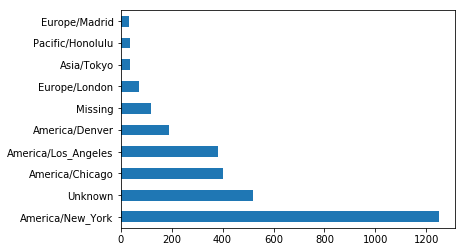

In [25]:
clean_tz = frame['tz'].fillna('Missing')  # 用`Missing`替换缺失值
clean_tz[clean_tz == ''] = 'Unknown'  # 用`Unknown`替换空白值

%matplotlib inline
tz_counts = clean_tz.value_counts()
print tz_counts[:10]  # 检视计数的前十项
tz_counts[:10].plot(kind='barh', rot=0)  # 绘图，可视化的方式展示前十项
